# LIBRARIES

In [141]:
# Data manipulation
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# File system manangement
import os

# sklearn preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


# IMPORTING DATA

In [142]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
print("Train Data Shape b4 adding target col : ",df_train.shape)
print("Test Data Shape b4 adding target col : ",df_test.shape)

Train Data Shape b4 adding target col :  (307511, 122)
Test Data Shape b4 adding target col :  (48744, 121)


In [143]:
df_train["source"] = "train"
df_test["source"] = "test"
print("Train Data Shape aftr adding target col : ",df_train.shape)
print("Test Data Shape aftr adding target col : ",df_test.shape)

Train Data Shape aftr adding target col :  (307511, 123)
Test Data Shape aftr adding target col :  (48744, 122)


In [144]:
df = pd.concat([df_train,df_test])

# EXPLORING DATA

We can easily convert the dataset into a pandas dataframe to perform exploratory data analysis. Simply pass in the dataset.data as an argument to pd.DataFrame(). 

In [145]:
df.shape

(356255, 123)

find the dimension of given data

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 123 entries, SK_ID_CURR to source
dtypes: float64(66), int64(40), object(17)
memory usage: 337.0+ MB


In [147]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'source'],
      dtype='object', length=123)

We can check the datatype of each column using dtypes to make sure every column has numeric datatype. If a column has different datatype such as string or character, we need to map that column to a numeric datatype such as integer or float. For this dataset, luckily there is no such column.

In [148]:
df.dtypes

SK_ID_CURR                      int64
TARGET                        float64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
source                         object
Length: 123, dtype: object

In [149]:
df.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,source
27252,298713,NaN,Cash loans,M,N,N,1,"135,000.00","848,745.00","36,090.00","675,000.00",Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.03,-14235,-2604,-686.00,-4534,NaN,1,1,0,1,0,0,Laborers,3.00,2,2,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.11,0.60,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,-399.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,test


In [150]:
df.SK_ID_CURR.nunique()

356255

We can view the first 5 rows in the dataset using head() function.

In [151]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,source
0,100002,1.00,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,train
1,100003,0.00,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train
2,100004,0.00,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0

# REMOVING COLUMNS

In [152]:
lst=[]
lst=df.columns
row=df.shape[0]
cols=[]
len(cols)

0

In [153]:
# Removing columns which has more than 60% of NA Values .
[cols.append(i) for i in lst if df[i].isnull().sum()/row*100 > 60]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [154]:
len(cols)

17

In [155]:
cols

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

In [156]:
cols_to_drop = [ 
               #has more than 60% of NA Values .
                'OWN_CAR_AGE',
                'YEARS_BUILD_AVG',
                'COMMONAREA_AVG',
                'FLOORSMIN_AVG',
                'LIVINGAPARTMENTS_AVG',
                'NONLIVINGAPARTMENTS_AVG',
                'YEARS_BUILD_MODE',
                'COMMONAREA_MODE',
                'FLOORSMIN_MODE',
                'LIVINGAPARTMENTS_MODE',
                'NONLIVINGAPARTMENTS_MODE',
                'YEARS_BUILD_MEDI',
                'COMMONAREA_MEDI',
                'FLOORSMIN_MEDI',
                'LIVINGAPARTMENTS_MEDI',
                'NONLIVINGAPARTMENTS_MEDI',
                'FONDKAPREMONT_MODE',

                #all null / constant / others
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19', 
                'FLAG_DOCUMENT_20', 
                'FLAG_DOCUMENT_21',
                'AMT_REQ_CREDIT_BUREAU_HOUR', 
                'AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK', 
                'AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 
                'AMT_REQ_CREDIT_BUREAU_YEAR'
                
]

In [157]:
data = df.drop(cols_to_drop, axis=1)

In [158]:
data.shape

(356255, 80)

In [159]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,source
0,100002,1.00,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.00,0.07,0.08,0.04,0.02,0.00,0.03,0.04,0.97,0.00,0.07,0.08,0.04,0.02,0.00,0.03,0.04,0.97,0.00,0.07,0.08,0.04,0.02,0.00,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",train
1,100003,0.00,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.08,0.03,0.29,0.01,0.05,0.01,0.09,0.05,0.99,0.08,0.03,0.29,0.01,0.06,0.00,0.10,0.05,0.99,0.08,0.03,0.29,0.01,0.06,0.01,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,train
2,100004,0.00,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,train
3,100006,0.00,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,"-9,833.00",-2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,train
4,100007,0.00,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,"-4,311.00",-3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,"-1,106.00",train


In [160]:
data.isnull().any()

SK_ID_CURR                      False
TARGET                           True
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE                      False
FLAG_EMAIL  

In [161]:
data.isna().sum()

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   2203
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [162]:
data.duplicated().sum()

0

In [163]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,"356,255.00",NaN,NaN,NaN,"278,128.00","102,842.10","100,001.00","189,064.50","278,128.00","367,191.50","456,255.00"
TARGET,"307,511.00",NaN,NaN,NaN,0.08,0.27,0.00,0.00,0.00,0.00,1.00
NAME_CONTRACT_TYPE,356255,2,Cash loans,326537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,356255,3,F,235126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,356255,2,N,235235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,356255,2,Y,246970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,"356,255.00",NaN,NaN,NaN,0.41,0.72,0.00,0.00,0.00,1.00,20.00
AMT_INCOME_TOTAL,"356,255.00",NaN,NaN,NaN,"170,116.06","223,506.82","25,650.00","112,500.00","153,000.00","202,500.00","117,000,000.00"
AMT_CREDIT,"356,255.00",NaN,NaN,NaN,"587,767.41","398,623.69","45,000.00","270,000.00","500,211.00","797,557.50","4,050,000.00"
AMT_ANNUITY,"356,219.00",NaN,NaN,NaN,"27,425.56","14,732.81","1,615.50","16,731.00","25,078.50","34,960.50","258,025.50"


# EXPLORATORY DATA ANALYSIS

## Correlation Check

Finding correlation between attributes is a highly useful way to check for patterns in the dataset.

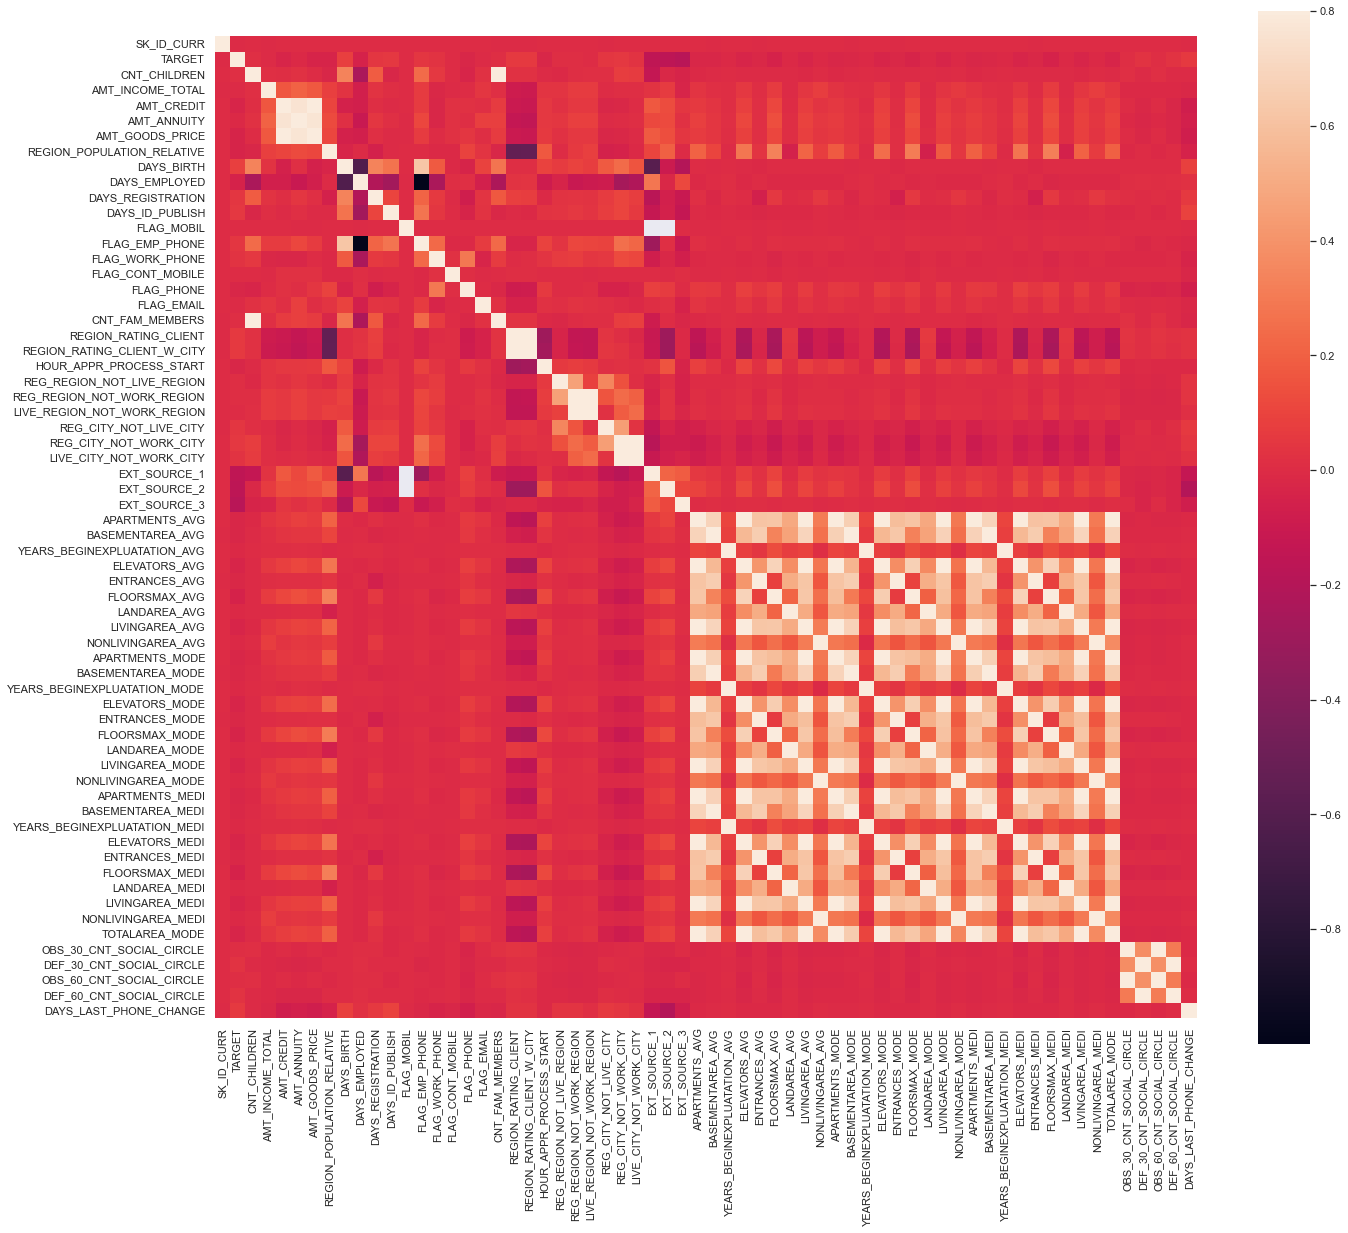

In [164]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# data.corr
corrmat=data.corr()
plt.figure(figsize=(22,19))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

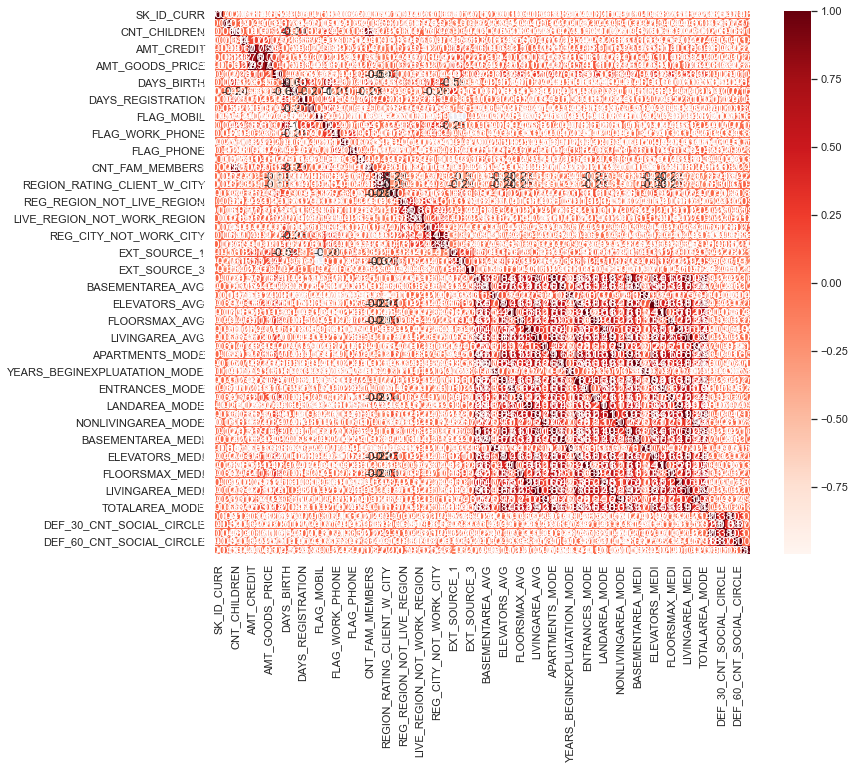

In [165]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

if there are pairs of features that have a high correlation, only one will be taken. The correlation value that is used as a benchmark as a high correlation is uncertain, generally the number 0.7 is used.

In [166]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

## Target Variable Distribution

In [167]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,source
0,100002,1.00,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.00,0.07,0.08,0.04,0.02,0.00,0.03,0.04,0.97,0.00,0.07,0.08,0.04,0.02,0.00,0.03,0.04,0.97,0.00,0.07,0.08,0.04,0.02,0.00,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",train
1,100003,0.00,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.08,0.03,0.29,0.01,0.05,0.01,0.09,0.05,0.99,0.08,0.03,0.29,0.01,0.06,0.00,0.10,0.05,0.99,0.08,0.03,0.29,0.01,0.06,0.01,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,train
2,100004,0.00,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,train
3,100006,0.00,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,"-9,833.00",-2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,train
4,100007,0.00,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,"-4,311.00",-3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,"-1,106.00",train


The number of defaults in the target variable is 282686 whereas the number of repayments is 24825


<AxesSubplot:ylabel='TARGET'>

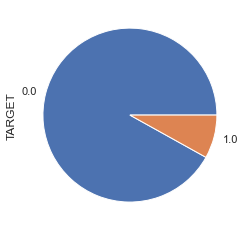

In [168]:
pd.options.display.float_format = '{:,.2f}'.format
x = data['TARGET'].value_counts()
print('The number of defaults in the target variable is {} whereas the number of repayments is {}'.format(x.loc[0],x.loc[1]))
x.plot.pie()

## Missing Value Cheking

Sometimes, in a dataset we will have missing values such as NaN or empty string in a cell. We need to take care of these missing values so that our machine learning model doesn’t break. To handle missing values, there are three approaches followed. 
When it comes time to build our machine learning models, we will have to fill in these missing values.

In [169]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

LANDAREA_MEDI                  59.18
LANDAREA_MODE                  59.18
LANDAREA_AVG                   59.18
BASEMENTAREA_AVG               58.27
BASEMENTAREA_MEDI              58.27
BASEMENTAREA_MODE              58.27
NONLIVINGAREA_MODE             54.95
NONLIVINGAREA_MEDI             54.95
NONLIVINGAREA_AVG              54.95
EXT_SOURCE_1                   54.43
ELEVATORS_MODE                 53.07
ELEVATORS_MEDI                 53.07
ELEVATORS_AVG                  53.07
WALLSMATERIAL_MODE             50.59
APARTMENTS_MODE                50.51
APARTMENTS_MEDI                50.51
APARTMENTS_AVG                 50.51
ENTRANCES_MODE                 50.08
ENTRANCES_MEDI                 50.08
ENTRANCES_AVG                  50.08
HOUSETYPE_MODE                 49.94
LIVINGAREA_AVG                 49.94
LIVINGAREA_MEDI                49.94
LIVINGAREA_MODE                49.94
FLOORSMAX_MODE                 49.50
FLOORSMAX_AVG                  49.50
FLOORSMAX_MEDI                 49.50
Y

In [170]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

In [171]:
pd.options.display.float_format = '{:,.2f}'.format
df_missing_val = pd.DataFrame(columns = ['column','number of missing vals'])

for column in data.columns:
    missing_val = data[column].isnull().sum()
    x = {'column':column,'number of missing vals':missing_val}
    df_missing_val= df_missing_val.append(x, ignore_index=True)
df_missing_val = df_missing_val[df_missing_val['number of missing vals'] !=0]
df_missing_val = df_missing_val.sort_values(by='number of missing vals',ascending=False)
print('Below is a table showing the number of missing values per column. The numbers are quite significant for some features. However, we shall deal withbthis at a later stage')

df_missing_val.head(10)

Below is a table showing the number of missing values per column. The numbers are quite significant for some features. However, we shall deal withbthis at a later stage


,column,number of missing vals
41,LANDAREA_AVG,210844
37,BASEMENTAREA_AVG,207584
42,NONLIVINGAREA_AVG,195766
33,EXT_SOURCE_1,193910
44,WALLSMATERIAL_MODE,180234
36,APARTMENTS_AVG,179948
39,ENTRANCES_AVG,178407
43,HOUSETYPE_MODE,177916
40,FLOORSMAX_AVG,176341
38,YEARS_BEGINEXPLUATATION_AVG,172863


## Corelation without Variable

In [172]:
cor_target = abs(data.corr())
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.3]
relevant_features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TARGET,0.00,NaN,0.02,0.00,0.03,0.04,0.08,0.04,0.04,0.05,0.00,0.03,0.00,0.02,0.00,0.06,0.02,0.01,0.01,0.04,0.05,0.16,0.16,0.18,0.03,0.02,0.01,0.02,0.04,0.01,0.01,0.01,0.03,0.06
CNT_CHILDREN,0.00,0.02,NaN,0.01,0.01,0.02,NaN,0.24,0.18,0.03,0.00,0.05,0.00,0.03,0.02,0.02,0.01,0.01,0.01,0.02,0.07,0.13,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00
AMT_INCOME_TOTAL,0.00,0.00,0.01,NaN,0.17,0.08,0.03,0.07,0.03,0.01,0.00,0.02,0.01,0.00,0.04,0.09,0.04,0.03,0.07,0.00,0.01,0.03,0.07,0.03,0.04,0.02,0.01,0.01,0.06,0.00,0.07,0.01,0.01,0.02
AMT_CREDIT,0.00,0.03,0.01,0.17,NaN,0.10,0.05,0.07,0.01,0.00,0.00,0.02,0.02,0.03,0.01,0.10,0.05,0.02,0.05,0.03,0.02,0.17,0.13,0.04,0.06,0.04,0.01,0.01,0.10,0.00,0.04,0.00,0.02,0.07
REGION_POPULATION_RELATIVE,0.00,0.04,0.02,0.08,0.10,NaN,0.03,0.00,0.05,0.00,0.00,0.01,0.01,0.09,0.04,NaN,0.17,0.00,0.06,0.05,0.04,0.10,0.20,0.00,0.21,0.10,0.01,0.04,NaN,0.05,0.07,0.01,0.01,0.05
DAYS_BIRTH,0.00,0.08,NaN,0.03,0.05,0.03,NaN,NaN,NaN,0.27,0.00,0.18,0.01,0.04,0.09,0.01,0.09,0.07,0.10,0.18,0.24,NaN,0.10,0.20,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.09
DAYS_EMPLOYED,0.00,0.04,0.24,0.07,0.07,0.00,NaN,NaN,0.21,0.27,0.00,0.24,0.01,0.01,0.06,0.03,0.09,0.04,0.11,0.09,0.26,0.28,0.02,0.11,0.02,0.00,0.01,0.00,0.02,0.01,0.01,0.01,0.02,0.02
DAYS_REGISTRATION,0.00,0.04,0.18,0.03,0.01,0.05,NaN,0.21,NaN,0.10,0.00,0.06,0.00,0.08,0.04,0.08,0.01,0.03,0.04,0.06,0.10,0.18,0.06,0.11,0.01,0.02,0.01,0.06,0.05,0.00,0.05,0.01,0.00,0.06
DAYS_ID_PUBLISH,0.00,0.05,0.03,0.01,0.00,0.00,0.27,0.27,0.10,NaN,0.00,0.05,0.00,0.04,0.03,0.01,0.03,0.04,0.05,0.08,0.10,0.13,0.05,0.13,0.01,0.01,0.00,0.02,0.01,0.01,0.00,0.01,0.00,0.09


In [173]:
type(relevant_features)
relevant_features.items

<bound method DataFrame.items of                              SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                          NaN    0.00          0.00   
TARGET                             0.00     NaN          0.02   
CNT_CHILDREN                       0.00    0.02           NaN   
AMT_INCOME_TOTAL                   0.00    0.00          0.01   
AMT_CREDIT                         0.00    0.03          0.01   
REGION_POPULATION_RELATIVE         0.00    0.04          0.02   
DAYS_BIRTH                         0.00    0.08           NaN   
DAYS_EMPLOYED                      0.00    0.04          0.24   
DAYS_REGISTRATION                  0.00    0.04          0.18   
DAYS_ID_PUBLISH                    0.00    0.05          0.03   
FLAG_MOBIL                         0.00    0.00          0.00   
FLAG_WORK_PHONE                    0.00    0.03          0.05   
FLAG_CONT_MOBILE                   0.00    0.00          0.00   
FLAG_PHONE                         0.00    0.02          

## Checking Categorical Features

In [174]:
data.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
source                         2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!


In [175]:
data.select_dtypes(exclude='object').nunique()

SK_ID_CURR                     356255
TARGET                              2
CNT_CHILDREN                       16
AMT_INCOME_TOTAL                 2741
AMT_CREDIT                       6480
REGION_POPULATION_RELATIVE         82
DAYS_BIRTH                      17467
DAYS_EMPLOYED                   12896
DAYS_REGISTRATION               15898
DAYS_ID_PUBLISH                  6224
FLAG_MOBIL                          2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
EXT_SOURCE_1                   134315
EXT_SOURCE_2                   127157
EXT_SOURCE_3                      814
APARTMENTS_AVG                   2391
BASEMENTAREA_AVG                 3831
YEARS_BEGINE

In [176]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans        91.66
Revolving loans    8.34
Name: NAME_CONTRACT_TYPE, dtype: float64


F     66.00
M     34.00
XNA    0.00
Name: CODE_GENDER, dtype: float64


N   66.03
Y   33.97
Name: FLAG_OWN_CAR, dtype: float64


Y   69.32
N   30.68
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied     81.42
Family            13.00
Spouse, partner    3.62
Children           1.04
Other_B            0.56
Other_A            0.28
Group of people    0.09
Name: NAME_TYPE_SUITE, dtype: float64


Working                51.45
Commercial associate   23.30
Pensioner              18.14
State servant           7.08
Unemployed              0.01
Student                 0.01
Businessman             0.00
Maternity leave         0.00
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special   70.84
Higher education                24.53
Incomplete higher                3.37
Lower secondary                  1.20
Academic degree                  0.06
Name: NAME_EDUCATION_TYPE, dtype: float64


Marri

# DEALING WITH CATEGORICAL VARIABLES

## One Hot Encoding

One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [177]:
train_data = pd.get_dummies(data)
test_data = pd.get_dummies(data)
print('The number of training features and variables is: {}'.format(train_data.shape))
print('The number of test features and variables is: {}'.format(test_data.shape))

The number of training features and variables is: (356255, 172)
The number of test features and variables is: (356255, 172)


## Label Encoding

In [178]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_data:
    if train_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_data[col])
            # Transform both training and testing data
            train_data[col] = le.transform(train_data[col])
            test_data[col] = le.transform(test_data[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


## Aligning the variables in the test and train datasets

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [179]:
target_col = train_data['TARGET']
train_data,test_data = train_data.align(test_data,join='inner',axis=1)
train_data['TARGET'] = target_col
print('The number of training features and variables after alignment is: {}'.format(train_data.shape))
print('The number of test features and variables after alignment is: {}'.format(test_data.shape))

The number of training features and variables after alignment is: (356255, 172)
The number of test features and variables after alignment is: (356255, 172)


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try dimensionality reduction (removing features that are not relevant) to reduce the size of the datasets.

# Modeling

In [180]:
target_col.shape

(356255,)

In [181]:
target_col.head()

0   1.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: TARGET, dtype: float64

In [182]:
from sklearn.model_selection import train_test_split
train_test_split(train_data,target_col)

[        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
 41470       148010    0.00             0        180,000.00   405,000.00   
 200615      332554    0.00             1        157,500.00   679,500.00   
 290578      436639    0.00             0        189,000.00   485,640.00   
 37396       143317    0.00             0         90,000.00   657,000.00   
 174584      302319    0.00             0        121,500.00   553,806.00   
 ...            ...     ...           ...               ...          ...   
 239438      377286    0.00             0        135,000.00   679,500.00   
 167976      294714    0.00             0        292,500.00 1,288,350.00   
 182010      310963    0.00             1        126,000.00   213,948.00   
 244316      382775    0.00             0        135,000.00   405,000.00   
 47946       450358     NaN             0         99,000.00   495,000.00   
 
         REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
 41470              

In [183]:
x_train, x_test, y_train, y_test = train_test_split(train_data,target_col)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(267191, 172) (267191,)
(89064, 172) (89064,)


In [184]:
x_train, x_test, y_train, y_test = train_test_split(train_data,target_col, train_size=0.8, random_state=20)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(285004, 172) (285004,)
(71251, 172) (71251,)


In [185]:
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [186]:
seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(285004, 171)
(71251, 171)
(285004,)
(71251,)


In [187]:
ftr_app = train_data.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = train_data['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((249378, 170), (106877, 170))